#Отчет по заданию №3 по практикуму на ЭВМ

Выполнил студент 317 группы Измаилов Павел Алексеевич

Москва, 22 ноября 2015

##Описание проделанной работы

В данном отчете содержатся описания и результаты экспериментов, проведенных мной в соответствии с третьим заданием по курсу практикума на ЭВМ на кафедре ММП ВМК МГУ. Мной были выполнены все части задания. 

##Структура модуля `optimization`

В данном разделе описывается структура модуля optimization.py, в котором реализованы все требуемые функции, связанные с решением задачи SVM.

### Класс SVM
В модуле реализован один основной класс — `SVM`.
Данный класс содержит следующие поля:
— sss
- `C` — параметр регуляризации
- `gamma` — ширина RBF-ядра. Если `gamma == 1`, то используется линейное ядро.
- `solver` — используемый солвер. Принимает одно из следующих значений.
    + `'primal_qp'` — метод внутренней точки для прямой задачи SVM с ограничениями (с помощью `cvxopt.solvers.qp`);
    + `'dual_qp'` — метод внутренней точки для двойственной задачи SVM (с помощью `cvxopt.solvers.qp`);
    + `'subgradient'` — медод субградиентного спуска для прямой задачи SVM без ограничений. Рассматривается как стохастический, так и обычный вариант; 
    + `'liblinear'` — метод, используемый в библиотеке `liblinear`;
    + `'libsvm'` — метод, используемый в библиотеке `libsvm`.
- `dual` — логическая переменная, показывающая, какая задача решается: прямая или двойственная.
- `sklearn_predictor` — в случае использования солверов `liblinear` и `libsvm` после вызова `fit()` в это поле записывается объект класса `sklearn.svm.linearSVC` или `sklearn.svm.SVC` соответственно.
- `primal_weights` — после вызова `fit()` для всех методов в это поле записывается вектор `w` весов SVM.
- `dual_weights` — после вызова `fit()` для методов, использующих двойственные переменные, в это поле записывается вектор `A` двойственных переменных.
- `data` — набор данных, использованный для обучения.
- `labels` — набор меток, использованный для обучения.
- `support_vectors` — опорные вектора.
- `tol` — число, используемая в том или ином правиле останова
- `max_iter` — максимальное количество итераций в оптимизации.
- `verbose` — целочисленное поле, показывающее, выводить ли на итерациях информацию о сходимости.

###Основные методы класса `SVM`
В данном разделе описываются основные методы класса `SVM`.

Конструктор класса имеет следующий интерфейс. 
```python
def __init__(self, C, gamma=0., solver='dual_qp', tol=1e-6, max_iter=100, verbose=False)
```
Здесь
- `C` — константа регуляризации
- `gamma` — ширина RBF-ядра
- `tol` — значение, используемое в том или ином правиле останова;
- `max_iter` — максимальное количество итераций;
- `verbose` — логическая переменная, показывающая, требуется ли выводить информацию о сходимости на итерациях (для методов, кроме `'subgradient'` эта информация отформатирована так, как это делает соответствующий библиотечный метод).

Таким образом, для создания объекта класса необходимо определить для него значения `C`, `gamma` и `solver`.

Метод `fit` предназначен для определения весов SVM и имеет следующий интерфейс.
```python
def fit(self, X, y, *args, **kwargs)
```
Здесь
- `X` — обучающая выборка;
- `y` — ответы на обучающей выборке;
- `*args`, `**kwargs`  — дополнительные аргументы, переаваемые солверу.

`X` и `y` — обучающая выборка и метки классов для нее. Аргументы `*args` и `**kwargs` передаются конкретному солверу. В зависимости от солвера, выбранного при создании объекта класса, метод `fit` вызывает тот или иной метод. Метод возвращает словарь с полями
- `'w'` — прямые веса. Для солвера `'libsvm'` эти веса определить не удается.
- `'A'` — двойственные переменные, если они доступны;
- `'status'` — логическая переменная, указывающая, была ли достигнута требуемая точность. Для солверов `'liblinear'` и `'libsvm'` это поле не заполняется;
- `'objective_curve'` — последовательность значений целевой функции на итерациях. Это поле удатся заполнить только для солвера `'subgradient'`, для остальных методов его значение — `None`;
- `'time'` — время, ушедшее на решение задачи оптимизации.

Метод `predict` предназначен для предсказывания меток класса для новых объектов. Его интерфейс имеет вид
```python
def predict(self, X, sign=True )
```
Здесь `X` — выборка, для которой требуется предсказать метки классов, `sign` — логическая переменная, показывающая, нужно ли возвращать метки классов или расстояния до разделяющей поверхности (второй вариант нужен для визуализации). Метод возвращает вектор меток классов.

Метод `visualize` предназначен для визуализации в случае, когда признаковое пространство имеет размерность 2. Он выводит на экран точки обычающей выборки, а также отображает разделяющую поверхность и опорные векторы. Его интерфейс имеет следующий вид.
```python
def visualize(self)
```

Методы `compute_primal_objective` и `compute_dual_objective` вычисляют значения целевых функций прямой и двойственной задачи соответственно. Их интерфейсы имеют следующий вид.
```python
def compute_primal_objective(self, X=None, y=None, w=None)
def compute_dual_objective(self, X=None, y=None, A=None)
```
Здесь `X`, `y` — обучающая выборка и ответы на ней, `w` — вектор прямых весов, `A` — вектор двойственных весов. В обоих случаях значениями весов по умолчанию являются значения, полученные при вызове функции `fit`, если она вызывалась, а в качестве значений по умолчанию для `X` и `y` — значения переданные в функцию `fit`. Методы возвращают число — значение соответствующей функции.

Метод `compute_w` позволяет вычислить значение прямых весов SVM по двойственным весам и обучающей выборке. Его интерфейс имеет следующий вид.
```python
def compute_w(self, X=None, y=None, A=None)
```
Здесь `X`, `y` — обучающая выборка и ответы на ней, `A` — вектор двойственных весов. Метод возвращает вектор прямых весов. Значениями весов и данных по умолчанию являются значения, использованные в `fit`.

Метод `compute_support_vectors` вычисляет опорные вектора и заносит их в соответствующее поле класса. Его интерфейс имеет следующий вид.
```python
def compute_support_vectors(self)
```

Прочие методы будут описаны дальше в случае необходимости. Кроме того, в самом модуле для каждого метода присутствуют подробные комментарии.

##Рассматриваемые методы оптимизации
В данном разделе описываются рассматриваемые методы, а также приводятся соответствующие программные интерфейсы. Все методы, кроме `'subgradient'` имеют параметр `obj_curve` — это логическая переменная, показывающая, требуется ли строить `objective_curve`.

###Метод `'primal_qp'`

Данный метод — метод внутренней точки для задачи квадратичного программирования (прямой задачи SVM с ограничениями). В соответствии с теорией, скорость сходимости данного метода сверхлинейная. Интерфейс данного метода имеет следующий вид.
```python
def svm_qp_primal_solver(self, obj_curve=False)
```

###Метод `'dual_qp'`
Данный метод — метод внутренней точки для задачи квадратичного программирования (двойственной задачи SVM). В соответствии с теорией, скорость сходимости данного метода сверхлинейная. Интерфейс соответствующего метода имеет следующий вид.
```python
def svm_qp_dual_solver(self, obj_curve=False)
```

###Метод `'subgradient'`
Данный метод — метод субградиентного спуска для прямой негладкой задачи SVM без ограничений. Эта задача имеет вид
$$\ell(w) = \frac 1 2 ||w||^2 + C \sum\limits_{n = 1}^ N \max\{0, 1 - y_n (w^T X_n + w_0)\} \rightarrow \min_w.$$

Нетрудно видеть, что один из субградиентов данной целевой функции имеет вид
$$\nabla_w \ell = 2 w + C \sum\limits_{n = 1}^ N (1 - y_n X_n)\zeta_n, $$
$$\nabla_{w_0} \ell = -C \sum\limits_{n = 1}^ N (1 - y_n) \zeta_n$$
где 
$$\zeta_n = \left \{ 
\begin{array} {l}
0, \mbox{ если } 0 > 1 - y_n (w^T X_n - w_0)\\
1, \mbox{ иначе}.\\
\end{array}\right.
$$
Обозначим через $\hat w$ полный вектор весов (т.е. конкатенацию $w$ и $w_0$), а через $\nabla_{\hat w} \ell$ — полный субградиент (т.е. конкатенацию $\nabla_{w} \ell$ и $\nabla_{w_0}\ell$).
Метод субградиентного спуска делает шаги вида 
$$\hat{w}_{n+1} = \hat{w}_n - c_n \frac {\nabla_{\hat{w}_n}\ell} {||\nabla_{\hat w_n} \ell||},$$
где последовательность $c_n$ задается заранее. Мы будем рассматривать последовательности вида 
$$c_n = \frac {\alpha} {n^\beta}.$$
Также мы будем рассматривать стохастический вариант данного метода — при этом шаг делается по градиенту, апроксимированному по некоторой подвыборке. В моей реализации на каждой эпохе (на каждом проходе по данным) метод перемешивает данные, и берет по очереди последовательные подвыборки заданного размера. При этом длина шага выбирается по правилу
$$c_n = \frac {\alpha} {k \cdot n^\beta},$$
где $k$ — число батчей, на которые делится выборка.

Данный метод имеет лишь сублинейную скорость сходимости.

Интерфейс данного метода имеет следующий вид.
```python
def svm_subgradient_solver(self, batch_num=1, alpha=None, beta=1)
```
Здесь `batch_num` — число частей, на которые разбивается выборка на каждой эпохе, `alpha` и `beta` — параметры, используемые в правиле выбора длины шага. Если эти значения не предоставляются, то используется `alpha = 1 / self.C`.

### Метод `'liblinear'`
Данный метод — метод реализованный в библиотеке `liblinear`. Его использование осуществляется посредством вызова библиотечного метода `sklearn.svm.linearSVC`. 

Программный интерфейс данного метода имеет следующий вид.
```python
def svm_liblinear_solver(self, obj_curve=False)
```

###Метод `'libsvm'`

Данный метод — метод, реализованный в библиотеке `libsvm`. Его использование осуществляется посредством вызова библиотечного метода `sklearn.svm.SVC`. 

Программный интерфейс данного метода имеет следующий вид.
```python
def svm_libsvm_solver(self, obj_curve=False)
```

## Эксперименты

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import importlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import optimization as opt

# from optimization import SVM
# importlib.reload(optimization)

Напишем функцию, генерирующую данные 

In [2]:
def generate_gauss_data(dim, num, seed=241, gap_norm=1., var1=0.5, var2=0.5, first_class=0.5):
    """
    Generate data from multivariate normal distributions
    :param dim: dimensionality
    :param num: number of points
    :param seed: random seed
    :param gap_norm: norm of the difference between the means
    :param var: variance
    :param first_class: fraction of points, belonging to the first class
    :return: data points and labels
    """
    np.random.seed(seed)
    mean_1 = np.random.normal(0, 5, (dim,))
    mean_2 = np.random.normal(0, 5, (dim,))
    mean_2 = mean_1 + gap_norm * (mean_2 - mean_1) / np.linalg.norm(mean_2 - mean_1)

    data_1 = np.random.multivariate_normal(mean_1, np.eye(dim)*var1**2, size=int(first_class * num))
    data_2 = np.random.multivariate_normal(mean_2, np.eye(dim)*var2**2, size=num - int(first_class * num))
    labels = np.vstack((np.ones((data_1.shape[0], 1)), -np.ones((data_2.shape[0], 1))))
    data = np.vstack((data_1, data_2))
    data = (data - np.mean(data, axis=0)) / np.var(data, axis=0)
    new_data = np.hstack((data, labels))
    np.random.shuffle(new_data)
    return new_data[:, :-1], new_data[:, -1][:, None]

### Сравнение методов
В данном разделе производится сравнение рассматриваемых методов. 

Для сравнения методов используется два вида графиков: первый показывает зависимость логарифмической невязки по функции от итерации для каждого из алгоритмов, а второй — зависимость точности метода, от времени его работы. К сожалению, построение графиков первого вида затруднительно, так как стандартные солверы не предоставляют информацию о своей сходимости по итерациям. Для построения графиков приходится последовательно запускать их на разное число итераций, и смотреть на итоговый результат. Я построю только один такой график — для небольшой задачи, так как этого достаточно, чтобы качественно понять, как ведут себя методы по итерациям. Для больших задач итерации разных методов слишком сильно отличаются по сложности, и большую информативность дают графики второго вида. 

Метод субградиентного спуска очень чувствителен к выбору длины шага. Во всех экспериментах я вручную выбирал эти параметры.

Опишем функцию, для построения первого вида графиков.

In [3]:
def plot_performance(objective_curve, optimal_value, *args, **kwargs):
    log_descr = [val - optimal_value for val in objective_curve if val - optimal_value > 1e-15]
    plt.plot(range(len(log_descr)), log_descr, *args, **kwargs)
    plt.semilogy()

Теперь опишем вторую функцию для построения графиков.

In [137]:
def plot_loss_vs_time(loss_vec, time_vec, optimal_value, *args, **kwargs):
    log_descr = [val - optimal_value for val in loss_vec if val - optimal_value > 1e-15]
    if (len(log_descr) < len(loss_vec)):
        log_descr += [1e-15]
    plt.plot(time_vec[:len(log_descr)], log_descr, *args, **kwargs)
    plt.semilogy()

####Линейное ядро
Произведем сравнение всех методов на линейной задаче. 

Так как для методов внутренней точки и субградиентного спуска известны оценки скорости сходимости, то можно сформулировать предположения, касательно того, как будут вести себя эти методы. Когда размерность задачи и объем данных не слишком велики, методы внутренней точки должны вести себя лучше, так как в этих случаях их итерации, которые существенно эффективней итераций метода субградиентного спуска, осуществляются достаточно быстро. На больших задачах, итерации этих методов становятся слишком трудоемкими, и (стохастический) метод субградиентного спуска может показать себя лучше.


##### Небольшая задача

Рассмотрим небольшую задачу: пусть число объектов равно 100, размерность 2.

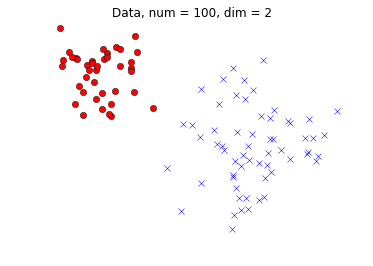

In [207]:
x, y = generate_gauss_data(num=100, dim=2, var1=0.5, var2=0.3, gap_norm=2., first_class=0.6, seed=7)
plt.plot(x[y[:, 0] == 1][:, 0], x[y[:, 0] == 1][:, 1], 'bx')
plt.plot(x[y[:, 0] == -1][:, 0], x[y[:, 0] == -1][:, 1], 'ro')
plt.axis("off")
plt.title("Data, num = 100, dim = 2")
plt.show()

Построим графики невязки по функции для всех методов.

In [273]:
%%capture
svm = opt.SVM(C=10., gamma=0, solver='primal_qp', max_iter=100)
solution = svm.fit(x, y, obj_curve=True)
primal_qp_obj_curve = solution['objective_curve']
svm = opt.SVM(C=10., gamma=0, solver='dual_qp', max_iter=100)
solution = svm.fit(x, y, obj_curve=True)
dual_qp_obj_curve = solution['objective_curve']
svm = opt.SVM(C=10., gamma=0, solver='subgradient', max_iter=100)
solution = svm.fit(x, y, alpha=0.05, beta=0.7, batch_num=5)
subgradient_obj_curve = solution['objective_curve']
svm = opt.SVM(C=10., gamma=0, solver='liblinear', max_iter=100)
solution = svm.fit(x, y, obj_curve=True)
liblinear_obj_curve = solution['objective_curve']
svm = opt.SVM(C=10., gamma=0, solver='libsvm', max_iter=100)
solution = svm.fit(x, y, obj_curve=True)
libsvm_obj_curve = solution['objective_curve']

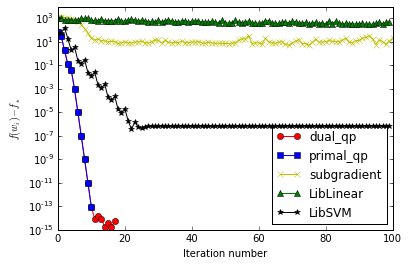

In [409]:
plot_performance(dual_qp_obj_curve[:20], primal_qp_obj_curve[-1], '-ro', label='dual_qp')
plot_performance(primal_qp_obj_curve[:20], primal_qp_obj_curve[-1], '-bs', label='primal_qp')
plot_performance(subgradient_obj_curve, primal_qp_obj_curve[-1], '-yx', label = 'subgradient')
plot_performance(liblinear_obj_curve, primal_qp_obj_curve[-1], '-g^', label = 'LibLinear')
plot_performance(libsvm_obj_curve, primal_qp_obj_curve[-1], '-k*', label = 'LibSVM')
plt.legend(loc=4)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Iteration number')
plt.show()

Изучим полученный результат. Как мы и предполагали, методы внутренней точки сошлись быстрее метода субградиентного спуска. Интересно отметить, что значения методов внутренней точки для прямой и двойственной задачи в точности совпадают по итерациям. Это можно объяснить тем, что метод `cvxopt.solvers.qp` решает сразу и прямую, и двойственную задачу квадратичного программирования. Правда, двойственная задача SVM, которую мы решаем в методе `'dual_qp'` — не совсем та задача, которая получается простым переходом к двойственной задаче квадратичного программирования, но эквивалентна ей. Также интересно, что метод `'libsvm'` перестает улучшать результаты начиная с некоторой итерации, несмотря на то, что он запускается с очень низким значением `tol=1e-20`.

В дальнейшем мы будем сравнивать методы по времени работы, а не по итерациям, так как такое сравнение более адекватно — разные методы имеют существенно разную сложность итераций. Для этог опишем функцию, возвращающую список значений, полученных заданным методом на заданном списке значений максимального количества итераций.

In [121]:
def get_loss_time_curve(solver, i_list, C=10.0, gamma=0., *args, **kwargs):
    loss_lst = []
    time_lst = []
    for i in i_list:
        svm = opt.SVM(C=C, gamma=gamma, solver=solver, max_iter=i+1, tol=1e-15)
        solution = svm.fit(x, y, *args, **kwargs)
        loss_lst.append(svm.compute_primal_objective())
        time_lst.append(solution['time'])
    return loss_lst, time_lst

In [412]:
%%capture
primal_loss_lst, primal_time_lst = get_loss_time_curve('primal_qp', range(50))
dual_loss_lst, dual_time_lst = get_loss_time_curve('dual_qp', range(50))
liblinear_loss_lst, liblinear_time_lst = get_loss_time_curve('liblinear', range(0, 10000, 1000))
libsvm_loss_lst, libsvm_time_lst = get_loss_time_curve('libsvm', range(0, 100, 10))

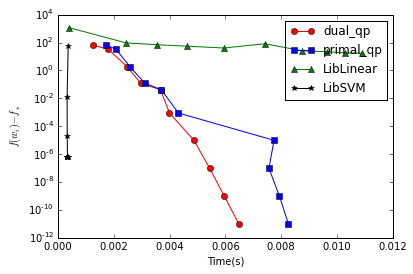

In [413]:
plot_loss_vs_time(dual_loss_lst, dual_time_lst, primal_loss_lst[-1], '-ro', label='dual_qp')
plot_loss_vs_time(primal_loss_lst, primal_time_lst, primal_loss_lst[-1], '-bs', label='primal_qp')
plot_loss_vs_time(liblinear_loss_lst, liblinear_time_lst, primal_loss_lst[-1], '-g^', label='LibLinear')
plot_loss_vs_time(libsvm_loss_lst, libsvm_time_lst, primal_loss_lst[-1], '-k*', label='LibSVM')
# plot_loss_vs_time(subgradient_loss_lst, subgradient_time_lst, primal_loss_lst[-1], '-yx', label='subgradient')
plt.legend(loc=1)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Time(s)')
plt.show()

Проанализируем полученные графики. Отмечу, что я не включил в рассмотрение метод субградиентного спуска, т.к. даже одна его итерация работает существенно дольше, чем все итерации методов внутренней точки, и включение его в график привело бы к тому, что все остальные методы сжались бы почти до вертикальных прямых. По тем же причинам я не стал запускать метод `'liblinear'` на большое число итераций. Из графика видно, что лучше всех ведет себя на данной задаче метод `'libsvm'`. Он сходится очень быстро, хотя и останавливается при точности порядка $10^{-6}$. Тем не менее, я полагаю, что на практике вряд ли понадобится большая точность, и на маленьких задачах следует использовать данный метод. 

#####Задача средних размеров

Рассмотрим задачу размерности $100$ с числом объектов $1000$.

In [470]:
%%capture
x, y = generate_gauss_data(num=1000, dim=100, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)
primal_loss_lst, primal_time_lst = get_loss_time_curve('primal_qp', range(0, 30, 2))
dual_loss_lst, dual_time_lst = get_loss_time_curve('dual_qp', range(0, 30, 2))
liblinear_loss_lst, liblinear_time_lst = get_loss_time_curve('liblinear', range(0, 30000, 3000))
libsvm_loss_lst, libsvm_time_lst = get_loss_time_curve('libsvm', range(0, 1000000, 100000))
subgradient_loss_lst, subgradient_time_lst = get_loss_time_curve('subgradient', range(0, 1000, 100), 
                                                                 batch_num=10, alpha=0.001, beta=1.)

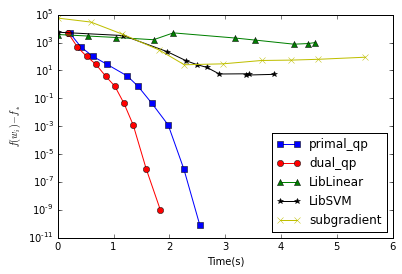

In [471]:
plot_loss_vs_time(primal_loss_lst[:20], primal_time_lst[:20], primal_loss_lst[-1], '-bs', label='primal_qp')
plot_loss_vs_time(dual_loss_lst[:10], dual_time_lst[:10], primal_loss_lst[-1], '-ro', label='dual_qp')
plot_loss_vs_time(liblinear_loss_lst, liblinear_time_lst, primal_loss_lst[-1], '-g^', label='LibLinear')
plot_loss_vs_time(libsvm_loss_lst, libsvm_time_lst, primal_loss_lst[-1], '-k*', label='LibSVM')
plot_loss_vs_time(subgradient_loss_lst, subgradient_time_lst, primal_loss_lst[-1], '-yx', label='subgradient')
plt.legend(loc=4)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Time(s)')
plt.show()

Проанализируем полученный график. Видно, что методы внутренней точки сошлись лучше всех остальных методов. Метод `'libsvm'` сходится несколько быстрее субградиентного спуска. Возможно, дальнейший подбор параметров длины шага привел бы к лучшим результатам для метода стохастического субградиентного спуска. Метод `'liblinear'` работает хуже всех остальных методов.

#####Большая Задача
Рассмотрим задачу размерности 10000 с числом объектов 1000.

In [7]:
x, y = generate_gauss_data(num=10000, dim=1000, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)

In [31]:
%%capture
x, y = generate_gauss_data(num=10000, dim=1000, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)
primal_loss_lst, primal_time_lst = get_loss_time_curve('primal_qp', range(5))
dual_loss_lst, dual_time_lst = get_loss_time_curve('dual_qp', range(5))
liblinear_loss_lst, liblinear_time_lst = get_loss_time_curve('liblinear', range(0, 20000, 2000))
libsvm_loss_lst, libsvm_time_lst = get_loss_time_curve('libsvm', range(0, 50000, 5000))
subgradient_loss_lst, subgradient_time_lst = get_loss_time_curve('subgradient', range(0, 2000, 500), 
                                                                 batch_num=10, alpha=0.001, beta=1.)

In [32]:
optimum = min(primal_loss_lst[-1], dual_loss_lst[-1], liblinear_loss_lst[-1], libsvm_loss_lst[-1], 
              subgradient_loss_lst[-1])

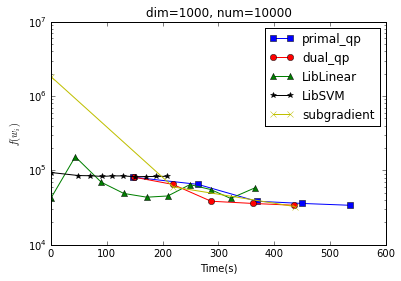

In [44]:
plot_loss_vs_time(primal_loss_lst, primal_time_lst, 0, '-bs', label='primal_qp')
plot_loss_vs_time(dual_loss_lst, dual_time_lst, 0, '-ro', label='dual_qp')
plot_loss_vs_time(liblinear_loss_lst, liblinear_time_lst, 0, '-g^', label='LibLinear')
plot_loss_vs_time(libsvm_loss_lst, libsvm_time_lst, 0, '-k*', label='LibSVM')
plot_loss_vs_time(subgradient_loss_lst, subgradient_time_lst, 0, '-yx', label='subgradient')
plt.legend(loc=1)
plt.ylabel(r'$f(w_i)$')
plt.xlabel('Time(s)')
plt.title('dim=1000, num=10000')
plt.show()

Отмечу сразу, что в данном эксперименте я по вертикальной оси в графике отложил значение функции, а не разность с оптимальным значением. Это связано с тем, что подсчет оптимального значения занял бы слишком много времени. Видно, что на данной задаче все методы показывают близкие результаты, выбрать среди них лучший, опираясь на результаты данного эксперимента затруднительно. 

####RBF-ядро
Ограничимся в этом разделе сравнением результатов на средней задаче — 1000 объектов, 100 признаков.

В этом разделе мы будем сравнивать методы по значению целевой функции двойственной задачи. Опишем функцию для построения соответствующей кривой.

In [161]:
def get_dual_loss_time_curve(solver, i_list, C=10.0, gamma=0., *args, **kwargs):
    loss_lst = []
    time_lst = []
    for i in i_list:
        svm = opt.SVM(C=C, gamma=gamma, solver=solver, max_iter=i+1, tol=1e-15)
        solution = svm.fit(x, y, *args, **kwargs)
        loss_lst.append(-svm.compute_dual_objective())
        time_lst.append(solution['time'])
    return loss_lst, time_lst

In [183]:
%%capture
x, y = generate_gauss_data(num=1000, dim=100, var1=0.6, var2=0.8, gap_norm=1., first_class=0.6, seed=7)
dual_loss_lst, dual_time_lst = get_dual_loss_time_curve('dual_qp', range(0, 10, 1), gamma=1.)
libsvm_loss_lst, libsvm_time_lst = get_dual_loss_time_curve('libsvm', range(0, 10000, 2000),gamma=1.)

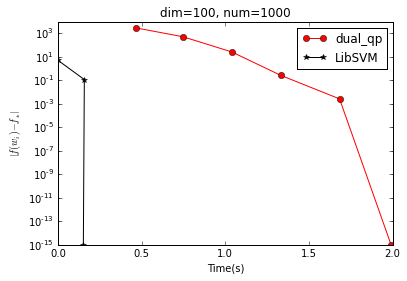

In [184]:
plot_loss_vs_time(dual_loss_lst, dual_time_lst, dual_loss_lst[-1], '-ro', label='dual_qp')
plot_loss_vs_time(libsvm_loss_lst, libsvm_time_lst, dual_loss_lst[-1], '-k*', label='LibSVM')
plt.legend(loc=1)
plt.ylabel(r'$|f(w_i) - f_*|$')
plt.xlabel('Time(s)')
plt.title('dim=100, num=1000')
plt.show()

Видно, что в данном случае метод `'libsvm'` сошелся намного быстрее, чем метод внутренней точки.

Повторим эксперимент на задаче чуть больше.

In [185]:
%%capture
x, y = generate_gauss_data(num=1500, dim=200, var1=0.6, var2=0.8, gap_norm=2., first_class=0.6, seed=7)
dual_loss_lst, dual_time_lst = get_dual_loss_time_curve('dual_qp', range(0, 10, 1), gamma=1.)
libsvm_loss_lst, libsvm_time_lst = get_dual_loss_time_curve('libsvm', range(0, 5000, 500),gamma=1.)

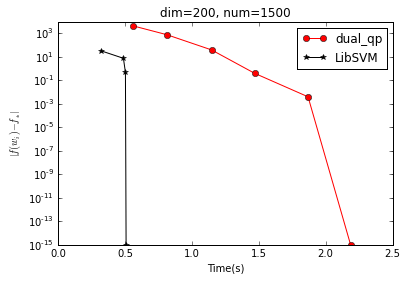

In [197]:
plot_loss_vs_time(dual_loss_lst, dual_time_lst, dual_loss_lst[-1], '-ro', label='dual_qp')
plot_loss_vs_time(libsvm_loss_lst[1:], libsvm_time_lst[1:], dual_loss_lst[-1], '-k*', label='LibSVM')
plt.legend(loc=1)
plt.ylabel(r'$|f(w_i) - f_*|$')
plt.xlabel('Time(s)')
plt.title('dim=200, num=1500')
plt.show()

Похоже, что для ядра RBF метод `'libsvm'` хорошо оптимизирован и работает лучше.

###Параметры ядра
В этом разделе реализуется кросс-валидация по параметрам `C` и `gamma`, а также проводится анализ зависимости точности классификации от этих параметров.


####Кросс-валидация
Реализуем процедуру подбора параметров C и gamma с помощью K-fold кросс-валидации.

In [218]:
def find_params(svm, c_list, gamma_list, x_train, x_test, y_train, y_test):
    scores = np.zeros((len(c_list), len(gamma_list)))
    opt_c, opt_gamma = 0, 0
    min_err = 1
    i = 0
    for C in c_list:
        j = 0
        for gamma in gamma_list:
            svm = opt.SVM(solver='dual_qp', max_iter=10, C=C, gamma=gamma, verbose=False)
            svm.fit(x_train, y_train)
            predicted_y = svm.predict(x_test)[:, None]
            err = np.sum(predicted_y != y_test)/len(y_test)
            if err < min_err:
                min_err = err
                opt_c = C
                opt_gamma = gamma
            j += 1
        i += 1
    return opt_c, opt_gamma

In [221]:
num = 750
dim = 3
x, y = generate_gauss_data(num=num, dim=dim, var1=0.6, var2=0.8, gap_norm=0.1, first_class=0.6, seed=7)
x_train = x[:(num * 2 / 3), :]
y_train = y[:(num * 2 / 3), :]
x_test = x[(num * 2 / 3):, :]
y_test = y[(num * 2 / 3):, :]
C_list = np.power(10., np.linspace(-1, 5, 10)).tolist()
gamma_list = np.power(10., np.linspace(-1, 2, 10)).tolist()
svm = opt.SVM(solver='dual_qp', max_iter=10, C=C, gamma=gamma, verbose=False)
print('Optimal C, gamma :', find_params(svm, C_list, gamma_list, x_train, x_test, y_train, y_test))

Optimal C, gamma : (10.0, 0.1)


####Случай плохо разделимых данных
Рассмотрим сначала случай плохо разделимых данных: сгенерируем их из двух близко расположенных нормальных распределений в пространстве небольшой размерности.

In [208]:
num = 1500
dim = 3
x, y = generate_gauss_data(num=num, dim=dim, var1=0.6, var2=0.8, gap_norm=0.1, first_class=0.6, seed=7)
x_train = x[:(num * 2 / 3), :]
y_train = y[:(num * 2 / 3), :]
x_test = x[(num * 2 / 3):, :]
y_test = y[(num * 2 / 3):, :]

In [106]:
C_list = np.power(10., np.linspace(-1, 5, 10)).tolist()
gamma_list = np.power(10., np.linspace(-1, 2, 10)).tolist()
scores = np.zeros((len(C_list), len(gamma_list)))
i = 0
for C in C_list:
    j = 0
    for gamma in gamma_list:
        svm = opt.SVM(solver='dual_qp', max_iter=10, C=C, gamma=gamma, verbose=False)
        svm.fit(x_train, y_train)
        predicted_y = svm.predict(x_test)[:, None]
        scores[i, j] = np.sum(predicted_y != y_test)/len(y_test)
        j += 1
    i += 1

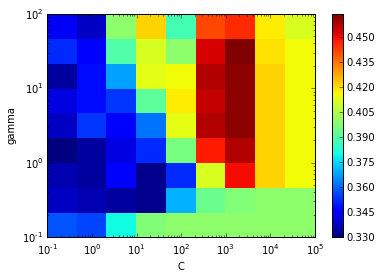

In [113]:
x, y = np.meshgrid(C_list, gamma_list)
# print(y)
plt.semilogy()
plt.semilogx()
plt.ylabel("gamma")
plt.xlabel("C")
plt.pcolormesh(x, y, scores)
plt.colorbar()
plt.show()

Из графика видно, что точность метода достаточно сильно зависит от параметров, и правильный их подбор важен.

####Случай хорошо разделимых данных
Рассмотрим теперь случай, когда данные хорошо разделимы.

In [116]:
num = 1500
dim = 20
x, y = generate_gauss_data(num=num, dim=dim, var1=0.6, var2=0.8, gap_norm=1., first_class=0.6, seed=7)
x_train = x[:(num * 2 / 3), :]
y_train = y[:(num * 2 / 3), :]
x_test = x[(num * 2 / 3):, :]
y_test = y[(num * 2 / 3):, :]

C_list = np.power(10., np.linspace(-1, 5, 10)).tolist()
gamma_list = np.power(10., np.linspace(-1, 2, 10)).tolist()
scores = np.zeros((len(C_list), len(gamma_list)))
i = 0
for C in C_list:
    j = 0
    for gamma in gamma_list:
        svm = opt.SVM(solver='dual_qp', max_iter=10, C=C, gamma=gamma, verbose=False)
        svm.fit(x_train, y_train)
        predicted_y = svm.predict(x_test)[:, None]
        scores[i, j] = np.sum(predicted_y != y_test)/len(y_test)
        j += 1
    i += 1

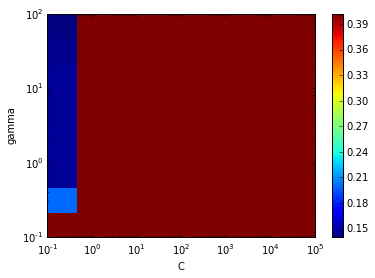

In [117]:
x, y = np.meshgrid(C_list, gamma_list)
# print(y)
plt.semilogy()
plt.semilogx()
plt.ylabel("gamma")
plt.xlabel("C")
plt.pcolormesh(x, y, scores)
plt.colorbar()
plt.show()

Видно, что в этом случае результаты не сильно зависят от параметров в широком диапазоне изменения параметров. Тем не менее разница наихудшего и наилучшего результата весьма велика.

### Метод Субградиентного Спуска
В данном разделе рассматривается зависимость скорости сходимости метода стохастического субградиентного спуска от размеров подвыборки, которая используется для аппроксимации градиента, а также от последовательности длин шага.

Все эксперименты опять будем проводить на задаче среднего размера.

####Последовательность Длин Шага
Рассмотрим зависимость результатов работы метода субградиентного спуска от последовательности длин шага.

Фиксируем `alpha = 0.0001` и сравним результаты при различных `beta`.

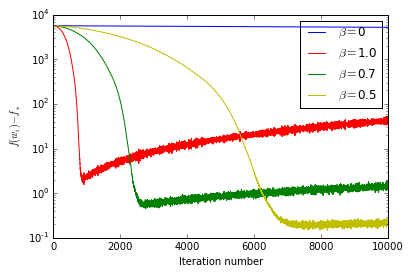

In [167]:
x, y = generate_gauss_data(num=1000, dim=100, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)
svm = opt.SVM(solver='dual_qp')
svm.fit(x, y)

optimal_value = svm.compute_primal_objective()
beta_lst = [0, 1., 0.7, 0.5]
loss_lst = []
for beta in beta_lst:
    svm = opt.SVM(solver='subgradient', max_iter=10000)
    loss_lst.append(svm.fit(x, y, alpha=0.00005, beta=beta, batch_num=1)['objective_curve'])
    
color_lst = ['-b', '-r', '-g', '-y']
for beta, obj_curve, color in list(zip(beta_lst, loss_lst, color_lst)):
    plot_performance(obj_curve, optimal_value, color, label = (r'$\beta = $'+str(beta)))
plt.legend(loc=1)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Iteration number')
plt.show()

В данном случае хуже всех показало себя правило постоянного параметра. Вообще говоря, для такого правила сходимость теоретически не обоснована. Правило с $\beta = 1$ на ранних итерациях сходится лучше всех, но потом теряет точность. Правила с $\beta = 0.7$ и $\beta = 0.5$ показывают близкие результаты: на ранних итерациях лучше сходится первый вариант, но потом его обгоняет второй.

Повторим эксперимент для `alpha` $= 10^{-6}$.

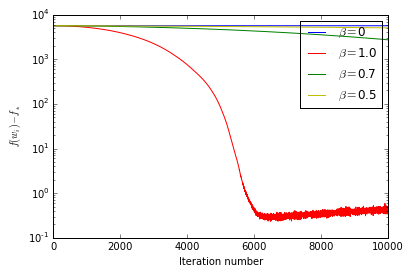

In [181]:
x, y = generate_gauss_data(num=1000, dim=100, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)
svm = opt.SVM(solver='dual_qp')
svm.fit(x, y)

optimal_value = svm.compute_primal_objective()
beta_lst = [0, 1., 0.7, 0.5]
loss_lst = []
for beta in beta_lst:
    svm = opt.SVM(solver='subgradient', max_iter=10000)
    loss_lst.append(svm.fit(x, y, alpha=1e-6, beta=beta, batch_num=1)['objective_curve'])
    
color_lst = ['-b', '-r', '-g', '-y']
for beta, obj_curve, color in list(zip(beta_lst, loss_lst, color_lst)):
    plot_performance(obj_curve, optimal_value, color, label = (r'$\beta = $'+str(beta)))
plt.legend(loc=1)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Iteration number')
plt.show()

В данном случае метод с $\beta = 1$ сошелся так же, как метод с $\beta = 0.5$ в прошлом эксперименте.

Вообще каждая конкретная задача требует подбора параметров $\alpha$ и $\beta$ и хороший способ выбрать одну из них для всех задач вряд ли существует.

#### Размер подвыборки в методе стохастического субградиентного спуска

В данном разделе рассматривается зависимость работы метода стохастического субградиентного спуска от размера подвыборки, по которой аппроксимируется градиент.

В первом эксперименте используем данные из эксперимента из прошлого пункта, фиксируем `alpha == 0.0001`, `beta == 0.5` и рассмотрим скорость сходимости стохастического метода по эпохам для различных значений `batch_num` — числа подвыборок, на которые разбивается выборка.

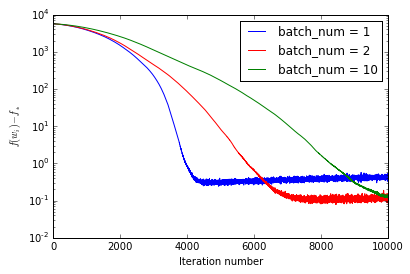

In [188]:
x, y = generate_gauss_data(num=1000, dim=100, var1=0.6, var2=0.8, gap_norm=1.3, first_class=0.6, seed=7)
svm = opt.SVM(solver='dual_qp')
svm.fit(x, y)

optimal_value = svm.compute_primal_objective()
batch_lst = [1, 2, 10]
loss_lst = []
for batch in batch_lst:
    svm = opt.SVM(solver='subgradient', max_iter=10000, tol=0)
    loss_lst.append(svm.fit(x, y, alpha=0.0001, beta=0.5, batch_num=batch)['objective_curve'])
    
color_lst = ['-b', '-r', '-g', '-y']
for batch, obj_curve, color in list(zip(batch_lst, loss_lst, color_lst)):
    plot_performance(obj_curve, optimal_value, color, label = ('batch_num = ' + str(batch)))
plt.legend(loc=1)
plt.ylabel(r'$f(w_i) - f_*$')
plt.xlabel('Iteration number')
plt.show()

Видно, что по эпохам быстрее всех сходится нестохастический метод субградиентного спуска. Вообще, стохастический градиентный спуск имеет смысл использовать тогда, когда есть возможность сделать лишь несколько проходов по данным. Тогда при правильном подборе параметров этот метод может обгонять метод градиентного спуска. Однако в задаче SVM, как показывают мои эксперименты, методам субградиентного спуска обычно нужны тысячи проходов по данным для сходимости, поэтому я не вижу смысла в использовании стохастического метода. 

##Визуализация
В данном разделе мы произведем визуализацию данных, разделяющих поверхностей и опорных векторов для двумерной задачи. Все методы строят одинаковые разделяющие поверхности, поэтому ограничимся в каждом из пунктов каким-нибудь одним.

###Линейное ядро
Воспользуемся методом `'primal_qp'`. На графике ниже обведенные объекты — опорные векторы. Черная прямая — разделяющая поверхность.

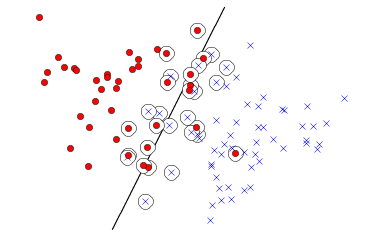

In [202]:
x, y = generate_gauss_data(num=100, dim=2, var1=0.5, var2=0.5, gap_norm=1., first_class=0.6, seed=7)
svm = opt.SVM(solver='primal_qp')
svm.fit(x, y)
svm.visualize()

###RBF-ядро
На этот воспользуемся методом `'dual_qp'`.

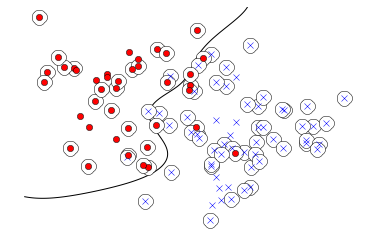

In [204]:
x, y = generate_gauss_data(num=100, dim=2, var1=0.5, var2=0.5, gap_norm=1., first_class=0.6, seed=7)
svm = opt.SVM(solver='dual_qp', gamma=0.5)
svm.fit(x, y)
svm.visualize()

##Выводы

В данной работе мной был поставлен ряд экспериментов по сравнению методов решения задачи SVM. В результате этих экспериментов можно сформулировать ряд выводов. 

Во-первых для SVM с линейным ядром во всех проведенных экспериментах методы внутренней точки показали себя лучше остальных. Однако, для очень больших задач эти методы неприменимы, так как сложность их итерации слишком велика (уже для относительно небольшой задачи с числом объектов $10000$ и числом признаков $1000$ одна итерация этих методов занимает две минуты на моем компьютере).

Во-вторых, для SVM с ядром 'RBF' стандартный метод из библиотеки `sklearn.svm` работает быстрее методов внутренней точки. 

В-третьих, было проведено сравнение стратегий выбора длины шага для метода субградиентного спуска. К сожалению, выбрать одну стратегию для всех задач не представляется возможным. 

Наконец, было проведено сравнение методов стохастического субградиентного спуска для разных размеров подвыборки, по которой аппроксимируется субградиент. В проведенных экспериментах использование стохастического метода не дает улучшения результатов.